# **LOCAL INTERPRETABLE MODEL-AGNOSTIC EXPLANATIONS (LIME)**


---

Es un marco de trabajo y una metodología para interpretar y explicar las predicciones de los modelos de aprendizaje automático. La idea clave detrás de LIME es que, aunque un modelo de aprendizaje automático puede ser una "**caja negra**" compleja y difícil de interpretar, es posible aproximar su comportamiento localmente (en el vecindario de una predicción específica) con un modelo más simple que es interpretable para los humanos.

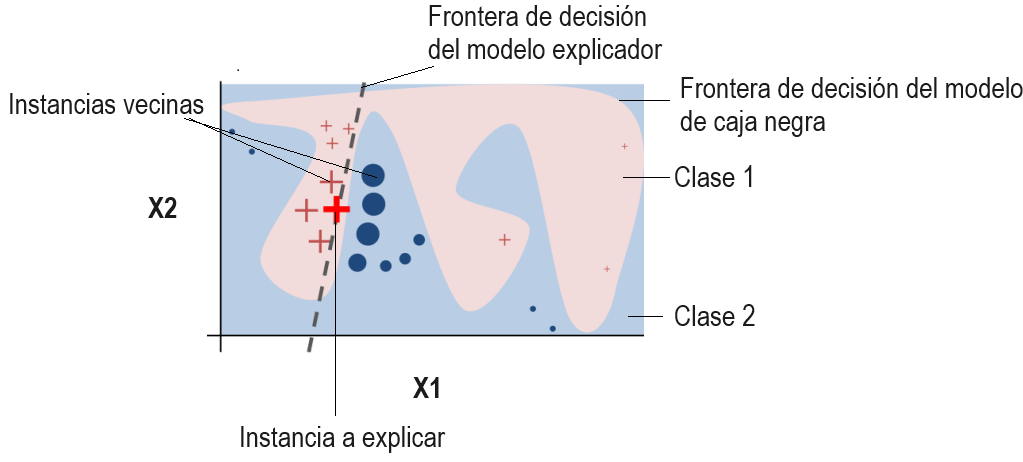
Figura 1. Ejmplode LIME

A continuación, explicaremos el concepto de LIME utilizando la Figura 1. Este diagrama ilustra cómo funciona un clasificador binario en un espacio bidimensional, donde 'X1' y 'X2' representan dos características distintas. Los puntos rojos corresponden a instancias de la 'Clase 1', y los puntos azules a instancias de la 'Clase 2'.

En el centro, la cruz roja más grande señala la 'Instancia a explicar'. A su alrededor, las instancias vecinas, que son puntos más pequeños, pueden pertenecer tanto a la 'Clase 1' como a la 'Clase 2'. Estos vecinos se utilizan para comprender mejor cómo el modelo toma decisiones cerca de la instancia de interés.

LIME procede generando un modelo más simple que intenta simular la complejidad del clasificador original (modelo de caja negra) en el entorno local de la instancia de interés. Esto se hace creando 'perturbaciones' de la instancia a explicar, que son variaciones de sus características, generando así un conjunto de 'instancias vecinas' teniendo en cuenta un limite de distancia. Estas instancias son ponderadas por su cercanía a la instancia original, dándole mayor importancia a las más próximas y menor a las distantes, en la practica se suele realizar este proceso por medio una función de kernel que decrece con la distancia en el espacio de características.

Con estas instancias vecinas mas influyentes de a cuerdo al kernel, LIME entrena un modelo simplificado, como puede ser un regresor lineal, que busca explicar el comportamiento del modelo de caja negra localmente. Una vez entrenado, este modelo proporciona una 'Frontera de decisión del modelo explicador', representada por la línea discontinua negra, que aproxima cómo el clasificador original separa las clases en ese espacio local.

La importancia de las características en la decisión del modelo simplificado se refleja en el tamaño de sus pesos o coeficientes. Estos pesos indican qué tan relevantes son las características para la clasificación realizada por el modelo explicador en el contexto local de la instancia a explicar y cuánto cambia la predicción cuando la característica varía.


Características clave de LIME:

Local: LIME se enfoca en explicar individualmente las predicciones, creando una explicación para cada caso al estudiar el comportamiento del modelo cerca del punto de interés.

Interpretable: Utiliza modelos simples (como regresiones lineales, árboles de decisión pequeños, o listas de características) que son fáciles de entender y visualizar, permitiendo a los usuarios comprender los factores que contribuyen a una predicción.

Model-agnostic: Puede ser aplicado a cualquier modelo de aprendizaje automático, sin importar su complejidad o arquitectura. No necesita conocimiento del funcionamiento interno del modelo, solo necesita acceso a las predicciones que el modelo genera.

El proceso de LIME generalmente incluye los siguientes pasos:

Perturbación de datos: Genera un conjunto de muestras alrededor de la instancia de interés, alterando o perturbando los valores de las características de la instancia original.

Obtención de predicciones del modelo: Usa el modelo de aprendizaje automático original para obtener las predicciones para las muestras perturbadas.

Ponderación de las muestras: Asigna pesos a las muestras generadas en función de su similitud con la instancia original, normalmente utilizando una función de peso que decae con la distancia.

Entrenamiento del modelo interpretable: Entrena un modelo simple e interpretable usando las muestras ponderadas y las predicciones correspondientes.

Presentación de la explicación: Interpreta los resultados del modelo simple para obtener una explicación de las características más influyentes en la predicción del modelo original para la instancia específica.

LIME es una herramienta valiosa para aumentar la transparencia y la confianza en los modelos de aprendizaje automático, y es especialmente útil en dominios donde las explicaciones son críticas, como en la medicina, la banca, o el derecho.

In [ ]:
!

array([ 0.20087447,  0.05471916,  0.22919674,  0.36090932,  0.12278097,
        0.29422783,  0.10066677,  0.40718739, -0.14251018,  0.41043449,
       -0.13517915, -0.09336222,  0.4491538 ,  0.42974027,  0.07198439,
        0.28577714,  0.04479578, -0.17260303, -0.08206504,  0.33895664,
        0.43749386,  0.14870938,  0.27857309,  0.31309522,  0.21969327,
       -0.13650435,  0.36274104,  0.15234697,  0.39106178,  0.40308361,
        0.20919833,  0.13355249, -0.20174073, -0.05404576,  0.08331006,
        0.45924732,  0.22709005,  0.20837229,  0.15888789,  0.19151375,
        0.11888175, -0.19009054, -0.0318859 ,  0.24639879,  0.39406665,
        0.15758474,  0.13063088,  0.379039  ,  0.3466157 ,  0.3124356 ,
        0.3893651 ,  0.27140023,  0.04765181,  0.35360393,  0.08813247,
        0.14721122,  0.18355533,  0.44907651,  0.35458706,  0.2959973 ,
        0.58624826, -0.21185175,  0.42788505,  0.39746741,  0.60485784,
        0.04267142,  0.2762622 ,  0.14202406,  0.08963272,  0.28

In [3]:
%cd /content/drive/MyDrive/LAB__XIA/LAB_XIA/LIME

/content/drive/MyDrive/LAB__XIA/LAB_XIA/LIME


In [ ]:
!git clone https://github.com/marcotcr/lime.git

Cloning into 'lime'...
remote: Enumerating objects: 2389, done.
remote: Total 2389 (delta 0), reused 0 (delta 0), pack-reused 2389
Receiving objects: 100% (2389/2389), 21.41 MiB | 12.17 MiB/s, done.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
